<a href="https://colab.research.google.com/github/adheeb4/7PAM2015-0105-2023-Individual-Project/blob/main/Individual_Project_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install fiftyone
!pip install fiftyone-db==0.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.2/677.2 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 12.6 MB/s eta 0:00:00
  Installing build dependenc

In [ ]:
!pip install albumentations

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz
import numpy as np
import cv2
import matplotlib.pyplot as plt

Migrating database to v0.23.6


INFO:fiftyone.migrations.runner:Migrating database to v0.23.6


In [ ]:
!fiftyone plugins download https://github.com/jacobmarks/fiftyone-albumentations-plugin.git



Copying plugin '@jacobmarks/albumentations_augmentation' to '/root/fiftyone/__plugins__/@jacobmarks/albumentations_augmentation'


In [ ]:

dataset_dir = "/content/drive/MyDrive/data"

train_images_dir = "/content/drive/MyDrive/data/validation-300/data"
train_labels_dir = "/content/drive/MyDrive/data/validation-300/labels.json"
validation_images_dir = "/content/drive/MyDrive/data/validation-300/data"
validation_labels_dir ="/content/drive/MyDrive/data/validation-300/labels.json"
test_images_dir = "/content/drive/MyDrive/data/test-30"


dataset_type = fo.types.COCODetectionDataset


"""
train_dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    max_samples=50,
    shuffle=True,
)
"""
train_dataset = fo.Dataset.from_dir(
    data_path=train_images_dir,
    labels_path=train_labels_dir,
    label_field="ground_truth",
    label_types=["detections", "segmentations"],
    name="train1",
    dataset_type = dataset_type,
    include_id=True
)

validation_dataset = fo.Dataset.from_dir(
    data_path=validation_images_dir,
    labels_path=validation_labels_dir,
    label_field="ground_truth",
    label_types=["detections", "segmentations"],
    name="validation1",
    dataset_type = dataset_type,
    include_id=True
)


# Load the test images into a FiftyOne dataset (no annotations)
test_dataset = fo.Dataset.from_dir(
    dataset_dir=test_images_dir,
    name="test1",
    dataset_type=fo.types.ImageDirectory,
    include_id=True
)


 100% |█████████████████| 300/300 [29.8s elapsed, 0s remaining, 12.9 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 300/300 [29.8s elapsed, 0s remaining, 12.9 samples/s]      


 100% |█████████████████| 300/300 [18.1s elapsed, 0s remaining, 29.6 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 300/300 [18.1s elapsed, 0s remaining, 29.6 samples/s]      


Ignoring unsupported parameter 'include_id' for importer type <class 'fiftyone.utils.data.importers.ImageDirectoryImporter'>


 100% |███████████████████| 30/30 [38.8ms elapsed, 0s remaining, 772.9 samples/s]     


INFO:eta.core.utils: 100% |███████████████████| 30/30 [38.8ms elapsed, 0s remaining, 772.9 samples/s]     


In [ ]:
print(train_dataset)
print(validation_dataset)

Name:        train1
Media type:  image
Num samples: 300
Persistent:  False
Tags:        []
Sample fields:
    id:                         fiftyone.core.fields.ObjectIdField
    filepath:                   fiftyone.core.fields.StringField
    tags:                       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth_detections:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_coco_id:       fiftyone.core.fields.IntField
Name:        validation1
Media type:  image
Num samples: 300
Persistent:  False
Tags:        []
Sample fields:
    id:                         fiftyone.core.fields.ObjectIdField
    filepath:                   fiftyone.core.fields.StringField
    tags:                      

In [ ]:
print(sample.metadata)
print(sample.ground_truth_detections)
print(sample.ground_truth_segmentations)

NameError: name 'sample' is not defined

In [ ]:
# Iterate over the first 20 detections
for detection in sample.ground_truth_segmentations.detections:
    print("height:", sample.metadata.height)
    print("width:", sample.metadata.width)
    print("Label:", detection.label)
    print("Bounding Box:", detection.bounding_box)
    print("Mask Shape:", detection.mask.shape if detection.mask is not None else None)
    print()


NameError: name 'sample' is not defined

In [ ]:
# Define the image dimensions
image_height = 427
image_width = 640

# Define the normalized bounding box coordinates and mask shapes
bbox_car_1 = [0.8669687500000001, 0.5556206088992974, 0.13303125, 0.2521545667447307]
mask_shape_car_1 = (108, 85)

bbox_car_2 = [0.770859375, 0.6403747072599532, 0.059015625, 0.11718969555035129]
mask_shape_car_2 = (50, 38)

bbox_bus = [0.154421875, 0.12583138173302108, 0.61471875, 0.7191100702576112]
mask_shape_bus = (307, 393)

bbox_car_3 = [0.09034375, 0.5694379391100702, 0.059765625, 0.08255269320843091]
mask_shape_car_3 = (35, 38)

bbox_person = [0.060546875, 0.5234192037470726, 0.036640624999999996, 0.18679156908665107]
mask_shape_person = (79, 23)

# Function to convert normalized coordinates to absolute coordinates
def get_absolute_bbox(normalized_bbox, image_height, image_width):
    x, y, w, h = normalized_bbox
    abs_x = int(x * image_width)
    abs_y = int(y * image_height)
    abs_w = int(w * image_width)
    abs_h = int(h * image_height)
    return abs_x, abs_y, abs_w, abs_h

# Get real bounding box coordinates
real_bbox_car_1 = get_absolute_bbox(bbox_car_1, image_height, image_width)
real_bbox_car_2 = get_absolute_bbox(bbox_car_2, image_height, image_width)
real_bbox_bus = get_absolute_bbox(bbox_bus, image_height, image_width)
real_bbox_car_3 = get_absolute_bbox(bbox_car_3, image_height, image_width)
real_bbox_person = get_absolute_bbox(bbox_person, image_height, image_width)

# Print the real bounding box coordinates
print("Real Bounding Box (Car 1):", real_bbox_car_1)
print("Real Bounding Box (Car 2):", real_bbox_car_2)
print("Real Bounding Box (Bus):", real_bbox_bus)
print("Real Bounding Box (Car 3):", real_bbox_car_3)
print("Real Bounding Box (Person):", real_bbox_person)


Real Bounding Box (Car 1): (554, 237, 85, 107)
Real Bounding Box (Car 2): (493, 273, 37, 50)
Real Bounding Box (Bus): (98, 53, 393, 307)
Real Bounding Box (Car 3): (57, 243, 38, 35)
Real Bounding Box (Person): (38, 223, 23, 79)


In [ ]:
for sample in train_dataset:
    print(sample.ground_truth_segmentations)


Streaming output truncated to the last 5000 lines.
            'mask': array([[False, False,  True,  True,  True,  True,  True,  True, False,
                    False, False, False, False, False, False],
                   [False,  True,  True,  True,  True,  True,  True,  True,  True,
                    False, False, False, False, False, False],
                   [False,  True,  True,  True,  True,  True,  True,  True,  True,
                    False, False, False, False, False, False],
                   [ True,  True,  True,  True,  True,  True,  True,  True,  True,
                     True, False, False, False, False, False],
                   [ True,  True,  True,  True,  True,  True,  True,  True,  True,
                     True, False, False, False, False, False],
                   [ True,  True,  True,  True,  True,  True,  True,  True,  True,
                     True,  True, False, False, False, False],
                   [ True,  True,  True,  True,  True,  True,  Tr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<Detections: {
    'detections': [
        <Detection: {
            'id': '65f4abfe4bd4a241a4ec722f',
            'attributes': {},
            'tags': [],
            'label': 'person',
            'bounding_box': [
                0.01875,
                0.13398126463700236,
                0.25996874999999997,
                0.35189695550351285,
            ],
            'mask': array([[False, False, False, ..., False, False, False],
                   [False, False, False, ..., False, False, False],
                   [False, False, False, ..., False, False, False],
                   ...,
                   [False, False, False, ..., False, False, False],
                   [False, False, False, ..., False, False, False],
                   [False, False, False, ..., False, False, False]]),
            'confidence': None,
            'index': None,
            'supercategory': 'person',
            'iscrowd': 0,
        }>,
        <Detection: {
            'id': '65f4abfe4bd4

In [27]:
print(sample.ground_truth_segmentations)


<Detections: {
    'detections': [
        <Detection: {
            'id': '65f4b34d4bd4a241a4ecb03c',
            'attributes': {},
            'tags': [],
            'label': 'car',
            'bounding_box': [
                0.8669687500000001,
                0.5556206088992974,
                0.13303125,
                0.2521545667447307,
            ],
            'mask': array([[False, False, False, ...,  True,  True, False],
                   [False, False, False, ...,  True,  True, False],
                   [False, False, False, ...,  True,  True, False],
                   ...,
                   [False, False, False, ..., False, False, False],
                   [False, False, False, ..., False, False, False],
                   [False, False, False, ..., False, False, False]]),
            'confidence': None,
            'index': None,
            'supercategory': 'vehicle',
            'iscrowd': 0,
        }>,
        <Detection: {
            'id': '65f4b34d4bd4a2

In [ ]:
import numpy as np
import cv2

detections = sample.ground_truth_segmentations.detections


masks = []
labels = []
b_boxes = []

for sample in train_dataset:
    sample_masks = []
    sample_labels = []
    sample_b_boxes = []

    for detection in sample.ground_truth_segmentations.detections:
        image_shape = (sample.metadata.width, sample.metadata.height, sample.metadata.num_channels) # Assuming no channel information is available
        b_box = detection['bounding_box']
        mask = detection['mask']
        label = detection['label']
        sample_b_boxes.append(b_box)
        sample_masks.append(mask)
        sample_labels.append(label)

    b_boxes.append(sample_b_boxes)
    masks.append(sample_masks)
    labels.append(sample_labels)




In [ ]:
print(masks[0])

[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [ True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [ True,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False

In [ ]:
print(b_boxes)

[[[0.3201866666666667, 0.14366, 0.35864, 0.30616000000000004], [0.32904, 0.55888, 0.05797333333333333, 0.060340000000000005], [0.34202666666666665, 0.53442, 0.03434666666666667, 0.016300000000000002], [0.5396799999999999, 0.5197999999999999, 0.05069333333333334, 0.05212]], [[0.0016875000000000002, 0.7701041666666666, 0.185390625, 0.21347916666666666], [0.78359375, 0.8281041666666666, 0.077875, 0.0948125], [0.31340625, 0.8364583333333333, 0.051015624999999995, 0.054625], [0.165921875, 0.7827291666666666, 0.12357812500000001, 0.12414583333333334], [0.352453125, 0.8150208333333333, 0.030671874999999998, 0.03258333333333333], [0.66615625, 0.8326875, 0.100421875, 0.11425], [0.633953125, 0.8375, 0.039781250000000004, 0.057958333333333334], [0.35164062500000004, 0.7535416666666667, 0.30529687499999997, 0.24645833333333333]], [[0.20627450980392156, 0.14799019607843136, 0.6502287581699346, 0.726454248366013], [0.3109967320261438, 0.4980065359477124, 0.09702614379084967, 0.10736928104575162], [0

In [ ]:
import numpy as np
import cv2

detections = sample.ground_truth_segmentations.detections


masks = []
labels = []
b_boxes = []

for sample in train_dataset:
    sample_masks = []
    sample_labels = []
    sample_b_boxes = []

    for detection in sample.ground_truth_segmentations.detections:
        image_shape = (sample.metadata.width, sample.metadata.height, sample.metadata.num_channels) # Assuming no channel information is available
        b_box = detection['bounding_box']
        mask = detection['mask']
        label = detection['label']
        sample_b_boxes.append(b_box)
        sample_masks.append(mask)
        sample_labels.append(label)

    b_boxes.append(sample_b_boxes)
    masks.append(sample_masks)
    labels.append(sample_labels)


In [ ]:
detections = sample.ground_truth_segmentations.detections
masked_regions = []
for detection in detections:
    mask = detection['mask']
    b_box = detection['bounding_box']

    # Convert bounding box coordinates to integers
    x, y, w, h = b_box
    x = int(x * sample.metadata.width)
    y = int(y * sample.metadata.height)
    w = int(w * sample.metadata.width)
    h = int(h * sample.metadata.height)

    # Print the bounding box coordinates and mask shape
    print("Bounding box coordinates:", x, y, w, h)
    print("Mask shape:", mask.shape)
    print("Image width:", sample.metadata.width)
    print("Image height:", sample.metadata.height)

    # Apply the bounding box to the mask
    masked_region = mask[y:y+h, x:x+w]
    masked_regions.append(masked_region)

    # Now you can use this masked region or perform further processing
    print("Masked region:")
    print(masked_region)


Bounding box coordinates: 554 237 85 107
Mask shape: (108, 85)
Image width: 640
Image height: 427
Masked region:
[]
Bounding box coordinates: 493 273 37 50
Mask shape: (50, 38)
Image width: 640
Image height: 427
Masked region:
[]
Bounding box coordinates: 98 53 393 307
Mask shape: (307, 393)
Image width: 640
Image height: 427
Masked region:
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Bounding box coordinates: 57 243 38 35
Mask shape: (35, 38)
Image width: 640
Image height: 427
Masked region:
[]
Bounding box coordinates: 38 223 23 79
Mask shape: (79, 23)
Image width: 640
Image height: 427
Masked region:
[]


In [ ]:
detections = sample.ground_truth_segmentations.detections

for detection in detections:
    mask = detection['mask']
    b_box = detection['bounding_box']

    # Convert bounding box coordinates to integers
    x, y, w, h = b_box
    x = int(x * sample.metadata.width)
    y = int(y * sample.metadata.height)
    w = int(w * sample.metadata.width)
    h = int(h * sample.metadata.height)

    # Apply the bounding box to the mask
    masked_region = mask[y:y+h, x:x+w]

    print("Bounding box coordinates:", x, y, w, h)
    print("Mask shape:", mask.shape)
    print("Image width:", sample.metadata.width)
    print("Image height:", sample.metadata.height)
    print("Masked region:")
    print(masked_region)


Bounding box coordinates: 554 237 85 107
Mask shape: (108, 85)
Image width: 640
Image height: 427
Masked region:
[]
Bounding box coordinates: 493 273 37 50
Mask shape: (50, 38)
Image width: 640
Image height: 427
Masked region:
[]
Bounding box coordinates: 98 53 393 307
Mask shape: (307, 393)
Image width: 640
Image height: 427
Masked region:
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Bounding box coordinates: 57 243 38 35
Mask shape: (35, 38)
Image width: 640
Image height: 427
Masked region:
[]
Bounding box coordinates: 38 223 23 79
Mask shape: (79, 23)
Image width: 640
Image height: 427
Masked region:
[]


Bounding box coordinates: 554 237 85 107
Mask shape: (108, 85)
Image width: 640
Image height: 427
Masked region:
[]


<ipython-input-57-cbc4016d4b9e>:28: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(masked_region, cmap='gray')
<ipython-input-57-cbc4016d4b9e>:28: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(masked_region, cmap='gray')


Bounding box coordinates: 493 273 37 50
Mask shape: (50, 38)
Image width: 640
Image height: 427
Masked region:
[]
Bounding box coordinates: 98 53 393 307
Mask shape: (307, 393)
Image width: 640
Image height: 427
Masked region:
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Bounding box coordinates: 57 243 38 35
Mask shape: (35, 38)
Image width: 640
Image height: 427
Masked region:
[]
Bounding box coordinates: 38 223 23 79
Mask shape: (79, 23)
Image width: 640
Image height: 427
Masked region:
[]


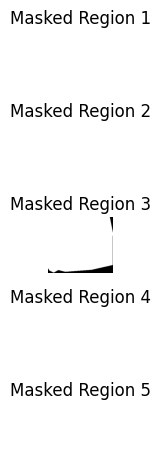

In [ ]:
import matplotlib.pyplot as plt

detections = sample.ground_truth_segmentations.detections

for i, detection in enumerate(detections, 1):
    mask = detection['mask']
    b_box = detection['bounding_box']

    # Convert bounding box coordinates to integers
    x, y, w, h = b_box
    x = int(x * sample.metadata.width)
    y = int(y * sample.metadata.height)
    w = int(w * sample.metadata.width)
    h = int(h * sample.metadata.height)

    # Apply the bounding box to the mask
    masked_region = mask[y:y+h, x:x+w]

    print("Bounding box coordinates:", x, y, w, h)
    print("Mask shape:", mask.shape)
    print("Image width:", sample.metadata.width)
    print("Image height:", sample.metadata.height)
    print("Masked region:")
    print(masked_region)

    # Plot the masked region
    plt.subplot(len(detections), 1, i)
    plt.imshow(masked_region, cmap='gray')
    plt.title(f'Masked Region {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
file_paths = []
for sample in train_dataset:
    # Retrieve file path of input image
    file_path = sample.filepath
    file_paths.append(file_path)


/content/drive/MyDrive/data/validation-300/data/000000000724.jpg
/content/drive/MyDrive/data/validation-300/data/000000001532.jpg
/content/drive/MyDrive/data/validation-300/data/000000001584.jpg
/content/drive/MyDrive/data/validation-300/data/000000002006.jpg
/content/drive/MyDrive/data/validation-300/data/000000005037.jpg
/content/drive/MyDrive/data/validation-300/data/000000006040.jpg
/content/drive/MyDrive/data/validation-300/data/000000006723.jpg
/content/drive/MyDrive/data/validation-300/data/000000007088.jpg
/content/drive/MyDrive/data/validation-300/data/000000008762.jpg
/content/drive/MyDrive/data/validation-300/data/000000009891.jpg
/content/drive/MyDrive/data/validation-300/data/000000010363.jpg
/content/drive/MyDrive/data/validation-300/data/000000011197.jpg
/content/drive/MyDrive/data/validation-300/data/000000012576.jpg
/content/drive/MyDrive/data/validation-300/data/000000014380.jpg
/content/drive/MyDrive/data/validation-300/data/000000015338.jpg
/content/drive/MyDrive/da

In [ ]:
print("Number of file paths:", len(file_paths))


Number of file paths: 300


In [ ]:
import cv2

# Iterate over the file paths and load the images
images = []
for file_path in file_paths:
    image = cv2.imread(file_path)
    images.append(image)

# Now `images` contains the loaded images


In [ ]:
print(len(images))

300


In [ ]:
import numpy as np

# Assuming images, labels, masks, and b_boxes are your lists
for i in range(len(images)):
    print(f"Image {i+1} shape:", images[i].shape if isinstance(images[i], np.ndarray) else len(images[i]))

for i in range(len(labels)):
    print(f"Label {i+1} shape:", labels[i].shape if isinstance(labels[i], np.ndarray) else len(labels[i]))

for i in range(len(masks)):
    print(f"Mask {i+1} shape:", masks[i].shape if isinstance(masks[i], np.ndarray) else len(masks[i]))

for i in range(len(b_boxes)):
    print(f"Bounding Box {i+1} shape:", b_boxes[i].shape if isinstance(b_boxes[i], np.ndarray) else len(b_boxes[i]))


Image 1 shape: (500, 375, 3)
Image 2 shape: (480, 640, 3)
Image 3 shape: (612, 612, 3)
Image 4 shape: (480, 640, 3)
Image 5 shape: (425, 640, 3)
Image 6 shape: (351, 640, 3)
Image 7 shape: (361, 640, 3)
Image 8 shape: (640, 478, 3)
Image 9 shape: (427, 640, 3)
Image 10 shape: (480, 640, 3)
Image 11 shape: (361, 640, 3)
Image 12 shape: (427, 640, 3)
Image 13 shape: (640, 480, 3)
Image 14 shape: (427, 640, 3)
Image 15 shape: (424, 640, 3)
Image 16 shape: (640, 640, 3)
Image 17 shape: (427, 640, 3)
Image 18 shape: (480, 640, 3)
Image 19 shape: (480, 640, 3)
Image 20 shape: (480, 640, 3)
Image 21 shape: (480, 640, 3)
Image 22 shape: (371, 640, 3)
Image 23 shape: (480, 640, 3)
Image 24 shape: (640, 480, 3)
Image 25 shape: (479, 640, 3)
Image 26 shape: (375, 500, 3)
Image 27 shape: (480, 640, 3)
Image 28 shape: (480, 640, 3)
Image 29 shape: (427, 640, 3)
Image 30 shape: (640, 423, 3)
Image 31 shape: (410, 640, 3)
Image 32 shape: (612, 612, 3)
Image 33 shape: (427, 640, 3)
Image 34 shape: (42

In [ ]:
print("image shape:", images.shape)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define your Faster R-CNN model architecture
def create_faster_rcnn_model():
    # Define your model architecture here
    return model

# Define your custom loss function
def faster_rcnn_loss(y_true, y_pred):
    # Define your custom loss function here
    return total_loss


# Convert bounding boxes to numpy array
b_boxes = np.array(b_boxes)

# Define your optimizer
optimizer = tf.keras.optimizers.Adam()

# Compile the model with custom loss function
model = create_faster_rcnn_model()
model.compile(optimizer=optimizer, loss=faster_rcnn_loss)

# Train the model
history = model.fit(images, [labels, masks, b_boxes], epochs=5)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (300,) + inhomogeneous part.

In [ ]:
, """validation_data=(x_val, [y_val_labels, y_val_bboxes])"""

In [ ]:

print(b_boxes)
print(labels)

[[0.3201866666666667, 0.14366, 0.35864, 0.30616000000000004], [0.32904, 0.55888, 0.05797333333333333, 0.060340000000000005], [0.34202666666666665, 0.53442, 0.03434666666666667, 0.016300000000000002], [0.5396799999999999, 0.5197999999999999, 0.05069333333333334, 0.05212], [0.0016875000000000002, 0.7701041666666666, 0.185390625, 0.21347916666666666], [0.78359375, 0.8281041666666666, 0.077875, 0.0948125], [0.31340625, 0.8364583333333333, 0.051015624999999995, 0.054625], [0.165921875, 0.7827291666666666, 0.12357812500000001, 0.12414583333333334], [0.352453125, 0.8150208333333333, 0.030671874999999998, 0.03258333333333333], [0.66615625, 0.8326875, 0.100421875, 0.11425], [0.633953125, 0.8375, 0.039781250000000004, 0.057958333333333334], [0.35164062500000004, 0.7535416666666667, 0.30529687499999997, 0.24645833333333333], [0.20627450980392156, 0.14799019607843136, 0.6502287581699346, 0.726454248366013], [0.3109967320261438, 0.4980065359477124, 0.09702614379084967, 0.10736928104575162], [0.7118

In [ ]:
print(masks[6][20])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False]


In [ ]:
import numpy as np


# Define the size of x_train and y_train
num_samples = len(masks)
image_height, image_width = masks[0].shape  # Assuming all masks have the same shape

# Initialize x_train and y_train arrays
x_train = np.zeros((num_samples, image_height, image_width), dtype=np.uint8)
y_train = np.zeros((num_samples, len(labels)), dtype=np.uint8)

# Populate x_train and y_train
for i in range(num_samples):
    x_train[i] = masks[i].astype(np.uint8)
    for j, label in enumerate(labels):
        if label in bounding_boxes[i]:
            y_train[i, j] = 1  # Set the corresponding label to 1 if it matches the bounding box

# Reshape x_train for compatibility with certain machine learning models (e.g., CNNs)
x_train = x_train.reshape(-1, image_height, image_width, 1)  # Add channel dimension

# Normalize x_train if needed (assuming pixel values are in [0, 1])
x_train = x_train / 255.0

# Now x_train contains the mask images, and y_train contains the labels as binary vectors


ValueError: could not broadcast input array from shape (31,22) into shape (153,135)

In [ ]:
import fiftyone.operators as foo
print(train_dataset)
compute_metadata = foo.get_operator("@voxel51/utils/compute_metadata")

import asyncio
import fiftyone as fo

# Define a function to compute metadata
async def compute_metadata_async(dataset):
    await dataset.compute_metadata(overwrite=True, delegate=True)

# Load your dataset
dataset = fo.Dataset.from_name("train2")

# Run the function within asyncio.run()
asyncio.run(compute_metadata_async(dataset))

Name:        train
Media type:  image
Num samples: 300
Persistent:  False
Tags:        []
Sample fields:
    id:            fiftyone.core.fields.ObjectIdField
    filepath:      fiftyone.core.fields.StringField
    tags:          fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    detections:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    coco_id:       fiftyone.core.fields.IntField


ValueError: Operator '@voxel51/utils/compute_metadata' not found

In [ ]:
session = fo.launch_app(train_dataset)


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.6

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.6

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



In [ ]:
print(train_dataset.summary())
train_dataset.compute_metadata()

Name:        train1
Media type:  image
Num samples: 300
Persistent:  False
Tags:        []
Sample fields:
    id:                         fiftyone.core.fields.ObjectIdField
    filepath:                   fiftyone.core.fields.StringField
    tags:                       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth_detections:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_coco_id:       fiftyone.core.fields.IntField


In [ ]:

for sample in train_dataset:
    num_detections = len(sample.detections.detections)
    sample["metadata"]["num_detections"] = num_detections

# Compute object classes distribution
class_distribution = {}
for sample in train_dataset:
    for detection in sample.detections.detections:
        label = detection.label
        class_distribution[label] = class_distribution.get(label, 0) + 1

# Compute object sizes statistics
total_area = 0
total_detections = 0
for sample in train_dataset:
    for detection in sample.detections.detections:
        bbox = detection.bounding_box
        # Bounding box format: [x_min, y_min, width, height]
        width = bbox[2]
        height = bbox[3]
        area = width * height
        total_area += area
        total_detections += 1

average_area = total_area / total_detections
average_area = total_area / total_detections


Could not connect session, trying again in 10 seconds



In [ ]:
print(class_distribution)
print(average_area)

NameError: name 'class_distribution' is not defined

In [ ]:
resized_train_dataset = fo.Dataset(name="resized_train_dataset")
resized_validation_dataset = fo.Dataset(name="resized_validation_dataset")

# Define the width and height you want to resize the images to
width = 256
height = 256
def resize(width, height, dataset, resized_dataset):
# Iterate over the samples in the dataset and resize the images
  for sample in dataset:
    image_path = sample.filepath
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (width, height))

    # Update the sample with the resized image
    sample["image"] = resized_image

    # Update labels (if any)
    #for label in sample.labels.values():
        # Perform any necessary updates to the label coordinates or attributes
        # based on the resized image dimensions

    # Update metadata (if any)
    sample.metadata["resized"] = True
    sample.metadata["original_width"] = sample.metadata.width
    sample.metadata["original_height"] = sample.metadata.height
    sample.metadata.width = width
    sample.metadata.height = height

    # Add the sample to the resized dataset
    resized_dataset.add_sample(sample)
  return resized_dataset



In [ ]:
resized_train_dataset = resize(256, 256, train_dataset, resized_train_dataset)
resized_validation_dataset = resize(256, 256, validation_dataset, resized_validation_dataset)

In [ ]:
print(resized_train_dataset)
print(resized_validation_dataset)

Name:        resized_train_dataset
Media type:  image
Num samples: 300
Persistent:  False
Tags:        []
Sample fields:
    id:                         fiftyone.core.fields.ObjectIdField
    filepath:                   fiftyone.core.fields.StringField
    tags:                       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth_detections:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_coco_id:       fiftyone.core.fields.IntField
    image:                      fiftyone.core.fields.ArrayField
Name:        resized_validation_dataset
Media type:  image
Num samples: 300
Persistent:  False
Tags:        []
Sample fields:
    id:                         fiftyone.core.fields.ObjectIdField
  

In [ ]:
session = fo.launch_app()

In [29]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 687.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5

In [ ]:
print(train_dataset.sample)

AttributeError: 'Dataset' object has no attribute 'sample'

In [ ]:
print(resized_train_dataset)
print

Name:        resized_train_dataset
Media type:  image
Num samples: 300
Persistent:  False
Tags:        []
Sample fields:
    id:                         fiftyone.core.fields.ObjectIdField
    filepath:                   fiftyone.core.fields.StringField
    tags:                       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth_detections:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_coco_id:       fiftyone.core.fields.IntField
    image:                      fiftyone.core.fields.ArrayField


<function print>

In [ ]:
import numpy as np
import cv2

detections = sample.ground_truth_segmentations.detections


masks = []
labels = []
b_boxes = []

for sample in resized_train_dataset:
    sample_masks = []
    sample_labels = []
    sample_b_boxes = []

    for detection in sample.ground_truth_segmentations.detections:
        image_shape = (sample.metadata.width, sample.metadata.height, sample.metadata.num_channels) # Assuming no channel information is available
        b_box = detection['bounding_box']
        mask = detection['mask']
        label = detection['label']
        sample_b_boxes.append(b_box)
        sample_masks.append(mask)
        sample_labels.append(label)

    b_boxes.append(sample_b_boxes)
    masks.append(sample_masks)
    labels.append(sample_labels)


In [ ]:
print(b_boxes)

[[[0.3201866666666667, 0.14366, 0.35864, 0.30616000000000004], [0.32904, 0.55888, 0.05797333333333333, 0.060340000000000005], [0.34202666666666665, 0.53442, 0.03434666666666667, 0.016300000000000002], [0.5396799999999999, 0.5197999999999999, 0.05069333333333334, 0.05212]], [[0.0016875000000000002, 0.7701041666666666, 0.185390625, 0.21347916666666666], [0.78359375, 0.8281041666666666, 0.077875, 0.0948125], [0.31340625, 0.8364583333333333, 0.051015624999999995, 0.054625], [0.165921875, 0.7827291666666666, 0.12357812500000001, 0.12414583333333334], [0.352453125, 0.8150208333333333, 0.030671874999999998, 0.03258333333333333], [0.66615625, 0.8326875, 0.100421875, 0.11425], [0.633953125, 0.8375, 0.039781250000000004, 0.057958333333333334], [0.35164062500000004, 0.7535416666666667, 0.30529687499999997, 0.24645833333333333]], [[0.20627450980392156, 0.14799019607843136, 0.6502287581699346, 0.726454248366013], [0.3109967320261438, 0.4980065359477124, 0.09702614379084967, 0.10736928104575162], [0

In [49]:
print(sample.metadata["width"])

256


In [ ]:
import json
import numpy as np

# Assuming `resized_train_dataset` is your dataset
y_train = []

for sample in resized_train_dataset:
    segmentation = sample.ground_truth_segmentations
    if segmentation is not None:
        segmentation_masks = []
        for seg in segmentation:
            # Parse the string segmentation mask into a numpy array
            mask_data = json.loads(seg)
            mask = np.array(mask_data["mask"])
            segmentation_masks.append(mask)
        y_train.append(segmentation_masks)
    else:
        # If no ground truth segmentation is available, append None
        y_train.append(None)

y_train = np.array(y_train)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
from fiftyone.core.evaluation import ClassificationResults

# Assuming `results` is your classification evaluation results object
results.print_report(classes=classes)

# Get the 10 most common classes in the dataset
counts = train_dataset.count_values("ground_truth_detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:10]

# Print a classification report for the top-10 classes
train_dataset.print_classification_report(classes=classes)

ImportError: cannot import name 'ClassificationResults' from 'fiftyone.core.evaluation' (/usr/local/lib/python3.10/dist-packages/fiftyone/core/evaluation.py)

In [ ]:
import fiftyone as fo


y_train = []
for sample in resized_train_dataset:
    # Retrieve segmentation masks
    segmentation_masks = sample.segmentations

    # Initialize list to store segmentation masks for current sample
    segmentation_masks_list = []

    # Iterate over segmentation masks
    for segmentation_mask in segmentation_masks:
        segmentation_masks_list.append(segmentation_mask.mask)

    # Append segmentation masks list to y_train
    y_train.append(segmentation_masks_list)

AttributeError: Sample has no field 'segmentations'

In [ ]:
!pip install --upgrade tensorflow


In [ ]:
import autokeras as ak



# Prepare your data for training

x_train = []
y_train = []
x_val = []
y_val = []

for sample in resized_train_dataset:
    # Retrieve input image
    input_image = sample["image"]
    x_train.append(input_image)

    # Retrieve segmentation mask
    segmentation_masks = sample.segmentations
    segmentation_mask = segmentation_masks[0].mask if segmentation_masks else None
    y_train.append(segmentation_mask)

for sample in resized_validation_dataset:
    # Retrieve input image
    input_image = sample["image"]
    x_val.append(input_image)

    # Retrieve segmentation mask
    segmentation_mask = sample["segmentations"]
    y_val.append(segmentation_mask)

# Convert lists to numpy arrays if necessary
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)



ModuleNotFoundError: No module named 'tensorflow.keras.layers.experimental'

In [ ]:
import numpy as np

# Assuming dataset is your dataset object containing detection data
for sample in train_dataset:
    # Accessing the detections from the sample
    detections = sample.detections

    # Iterate over each detection in the sample
    for detection in detections.detections:
        label = detection.label
        mask = detection.mask

        # Flatten the mask into a 1D array
        flattened_mask = np.ravel(mask)

        # Print or store the flattened mask and its corresponding label for ML training
        print("Label:", label)
        print("Flattened Mask:", flattened_mask)


AttributeError: Sample has no field 'detections'

In [48]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

NameError: name 'x_train' is not defined

In [ ]:
print(y_train)

NameError: name 'y_train' is not defined

In [ ]:
import numpy as np

# Convert categorical labels to segmentation masks
num_classes = 2  # Number of classes (assuming binary segmentation)
height, width = 256, 256  # Image dimensions

y_train_masks = np.zeros((len(y_train), height, width, num_classes), dtype=np.uint8)
y_val_masks = np.zeros((len(y_val), height, width, num_classes), dtype=np.uint8)

for i in range(len(y_train)):
    label_index = int(y_train[i][0])  # Convert to integer
    y_train_masks[i, :, :, label_index] = 1

for i in range(len(y_val)):
    label_index = int(y_val[i][0])  # Convert to integer
    y_val_masks[i, :, :, label_index] = 1

# Now, y_train_masks and y_val_masks contain segmentation masks


ValueError: invalid literal for int() with base 10: 'detections'

In [46]:
import json

def inspect_json(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
        print(json.dumps(data, indent=4))

# Example usage
inspect_json('/content/drive/MyDrive/data/train-300/labels.json')


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [44]:
import json
import os
import numpy as np
import tensorflow as tf
from PIL import Image

# Define your segmentation model architecture using TensorFlow

def load_data(image_folder, json_path):
    # Load your dataset here
    # Example: Load images and their corresponding segmentation masks
    image_files = sorted(os.listdir(image_folder))
    images = [np.array(Image.open(os.path.join(image_folder, f))) for f in image_files if f.endswith('.jpg')]

    with open(json_path, 'r') as f:
        data = json.load(f)
        # Assuming your JSON file contains segmentation mask file names or paths
        mask_files = data['masks']  # Adjust this according to your JSON structure
        masks = [np.array(Image.open(os.path.join(image_folder, mask))) for mask in mask_files]

    return np.array(images), np.array(masks)

def main():
    # Paths to image folder and JSON file
    image_folder = '/content/drive/MyDrive/data/train-300/data'
    json_path = '/content/drive/MyDrive/data/train-300/labels.json'

    # Load data
    x_train, y_train = load_data(image_folder, json_path)

    # Define and compile your segmentation model
    model = tf.keras.Sequential([
        # Define your model layers here
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train your segmentation model
    model.fit(x_train, y_train, epochs=10, batch_size=32)  # Adjust epochs and batch size as needed

if __name__ == "__main__":
    main()


KeyError: 'masks'

In [38]:
!pip install autokeras
!pip install tensorflow


In [36]:
import tensorflow as tf

In [41]:
import json
from tensorflow.keras.layers import preprocessing
import autokeras as ak
import numpy as np
from PIL import Image
import os

def load_data(image_folder):
    # Load your dataset here
    # Example: Load images and their corresponding segmentation masks
    x_train = np.array([np.array(Image.open(os.path.join(image_folder, f'image{i}.jpg'))) for i in range(1, 300)])
    y_train = np.array([np.array(Image.open(os.path.join(image_folder, f'mask{i}.jpg'))) for i in range(1, 300)])
    return x_train, y_train

def main():
    # Load data
    image_folder = '/path/to/your/image/folder'
    x_train, y_train = load_data(image_folder)

    # Load JSON configuration
    with open('config.json', 'r') as f:
        config = json.load(f)

    # Initialize SemanticSegmentation with AutoKeras
    seg_model = ak.SemanticSegmentation(**config)  # Pass configuration from JSON

    # Fit model
    seg_model.fit(x_train, y_train, epochs=config['epochs'])

    # Evaluate model - not necessary for training, but useful for validation
    # accuracy = seg_model.evaluate(x_test, y_test)
    # print("Test Accuracy:", accuracy)

if __name__ == "__main__":
    main()


ImportError: cannot import name 'preprocessing' from 'tensorflow.keras.layers' (/usr/local/lib/python3.10/dist-packages/keras/_tf_keras/keras/layers/__init__.py)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Define the U-Net architecture for segmentation
def unet_segmentation(input_shape, num_classes):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Decoder
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    up1 = UpSampling2D(size=(2, 2))(conv2)

    # Output layer
    outputs = Conv2D(num_classes, 1, activation='softmax')(up1)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the segmentation model
input_shape = (256, 256, 3)  # Example input shape, adjust as needed
num_classes = 2  # Example number of classes (background + foreground)
model = unet_segmentation(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/accuracy_metrics.py", line 459, in sparse_categorical_accuracy
        matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 969, in sparse_categorical_matches
        matches = tf.cast(tf.equal(y_true, y_pred), backend.floatx())

    ValueError: Dimensions must be equal, but are 2 and 256 for '{{node Equal}} = Equal[T=DT_FLOAT, incompatible_shape_error=true](Cast_1, Cast_2)' with input shapes: [?,2], [?,256,256].


In [ ]:
auto_model = ak.AutoModel(
    inputs=ak.ImageInput(),
    outputs="segmentation",
    max_trials=10,
)
auto_model.fit(x_train, y_train, validation_data=(x_val, y_val))
"""
# Evaluate the trained model on your test dataset
# (Assuming you have test data for evaluation)
x_test = ...  # Extract test images
y_test = ...  # Extract ground truth segmentation masks
results = auto_model.evaluate(x_test, y_test)

# Visualize the results in FiftyOne
session = fo.launch_app(dataset)
session.view(dataset=dataset, eval_key="auto_ml_results")
"""

UnboundLocalError: local variable 'graph' referenced before assignment

In [ ]:

# Define and train an AutoKeras image segmentation model
clf = ak.SegmentationHead()
auto_model = ak.AutoModel(inputs=ak.ImageInput(), outputs=clf, max_trials=10)
auto_model.fit(x_train, y_train)

# Evaluate the trained model on your dataset
# (Assuming you have test data for evaluation)
x_test = ...  # Extract test images
y_test = ...  # Extract ground truth segmentation masks
results = auto_model.evaluate(x_test, y_test)

# Visualize the results in FiftyOne
session = fo.launch_app(dataset)
session.view(dataset=dataset, eval_key="auto_ml_results")

In [ ]:
num_columns = 4

# Calculate the number of rows required based on the number of samples and number of columns
num_samples = len(resized_dataset)
num_rows = (num_samples + num_columns - 1) // num_columns

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

# Iterate over the samples in the dataset and visualize the images
for i, sample in enumerate(resized_dataset):
    # Calculate the row and column index for the subplot
    row_index = i // num_columns
    col_index = i % num_columns

    # Load and display the image
    image = sample["image"]
    axes[row_index, col_index].imshow(image)
    axes[row_index, col_index].axis("off")

    # Set the title as the sample ID
    axes[row_index, col_index].set_title(sample.id)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Access file paths of images
filepaths = [sample.filepath for sample in train_dataset]

# Get image dimensions
image_sizes = []
for filepath in filepaths:
    # Load image and get dimensions
    image = plt.imread(filepath)
    if len(image.shape) == 2:  # Grayscale image
        height, width = image.shape
    else:  # Color image
        height, width, _ = image.shape
    image_sizes.append((width, height))

# Convert to numpy array for easier manipulation
image_sizes = np.array(image_sizes)

# Plot KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=image_sizes[:, 0], label="Width", fill=True)
sns.kdeplot(data=image_sizes[:, 1], label="Height", fill=True)

# Set plot labels and title
plt.xlabel("Image Dimension")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) of Image Size Distribution")

# Add legend
plt.legend()

# Show plot
plt.show()


In [ ]:


def preprocess(sample, resize_shape=(256, 256)):
  image_data = cv2.imread(sample.filepath)
  binary_mask = np.zeros(image_data.shape[:2], dtype=np.uint8)

  detections = sample["detections"]
  if detections is not None:
    for detection in detections.values():
      for seg in detection.segmentation:
        cv2.fillPoly(binary_mask, [np.array(seg)], 255)
  #for seg in sample.mask.ground_truth.segmentation:
   # cv2.fillPoly(binary_mask, np.array(seg), 255)
  if resize_shape:
    image_data = cv2.resize(image_data, resize_shape)
    binary_mask = cv2.resize(binary_mask, resize_shape, interpolation=cv2.INTER_NEAREST)

  image_data = image_data / 255.0

  return image_data, binary_mask


preprocessed_images = []
preprocessed_masks = []

for sample in dataset:
 # image = sample["image"]
#mask = sample["ground_truth"]

  preprocessed_image, preprocessed_mask = preprocess(sample)

  preprocessed_images.append(preprocessed_image)
  preprocessed_masks.append(preprocessed_mask)
